This project aims to analyze human activities on earth. The plan is to collect maps and understand their correlation. I started with the maps of historical night light (https://www.nature.com/articles/s41597-020-0510-y) and showed some example below. I will collect more maps as the project going.

In [2]:
%matplotlib inline
import numpy as np
import struct
from osgeo import gdal
from osgeo import ogr
from osgeo import osr
from osgeo import gdal_array
from osgeo.gdalconst import *
import matplotlib.pyplot as plt

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


follow the way to copy & paste the file path descibed in https://medium.com/ml-book/simplest-way-to-open-files-from-google-drive-in-google-colab-fae14810674

In [3]:
dataset = gdal.Open(r'drive/MyDrive/data_incubator_project/Harmonized_DN_NTL_2007_calDMSP.tif')
print(dataset.GetMetadata())
layer=dataset.RasterCount
print('number of layers:', layer) 
width=dataset.RasterXSize
print('number of pixel in x-axis:', width) 
height=dataset.RasterYSize
print('number of pixel in x-axis:', height)

{'AREA_OR_POINT': 'Area', 'TIFFTAG_SOFTWARE': 'MATLAB 8.6, Mapping Toolbox 4.2'}
number of layers: 1
number of pixel in x-axis: 43201
number of pixel in x-axis: 16801


## Plot the night light image in 2007

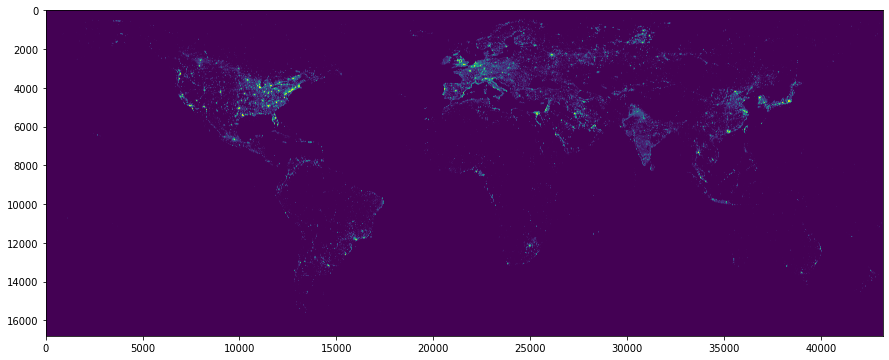

In [16]:
tifArray = dataset.ReadAsArray()
band1 = dataset.GetRasterBand(1)
band1Array = band1.ReadAsArray()
plt.figure(figsize=(15, 15))
imgplot = plt.imshow(band1Array)
plt.show()

## Plot the histogram of the brightness

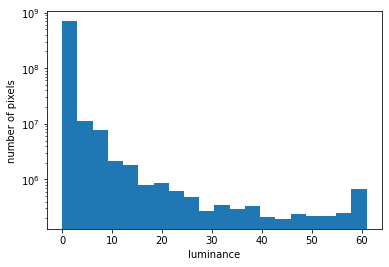

In [17]:
# use flatten to convert to 1D would speed up the plotting
oneD = band1Array.flatten()
plt.hist(oneD, bins=20)
plt.yscale('log')
plt.xlabel('luminance')
plt.ylabel('number of pixels')
plt.show()